In [125]:
%%HTML
<script src="require.js"></script>

In [126]:
from IPython.display import display, HTML
HTML(
    """
    <script
        src='https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js'>
    </script>
    <script>
        code_show=true;
        function code_toggle() {
        if (code_show){
        $('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
        } else {
        $('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
        }
        code_show = !code_show
        }
        $( document ).ready(code_toggle);
    </script>
    <form action='javascript:code_toggle()'>
        <input type="submit" value='Click here to toggle on/off the raw code.'>
    </form>
    """
)

In [127]:
# Import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
# import pingouin as pg

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.linear_model import Lasso

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

<center><img src = 'title_page_ACS.png'></center>

<div style='display: flex; justify-content: space-between; align-items: center; padding: 10px; width: 100%; background-color: #F5F5DC'>
    <h1>ABSTRACT</h1>
    <img src='png.png' style='height: 50px; width: auto; margin-left: auto; padding: 10px'>
</div>

This study examines how Filipino families' finances shifted from 2018 to 2021 using data from the Family Income and Expenditure Survey. We identify significant income differences during this period, but no notable changes in savings and expenses. The focus narrows to two provinces with the highest and lowest income variations.

Analyzing the link between income and factors like family size and expense types, we uncover distinctive economic landscapes in these provinces. Recommendations aim to improve the province with lower income differences, learning from the one with higher disparities. We extend our analysis to neighboring provinces within the region, suggesting broader strategies if similarities emerge.

This study aims to guide practical policies that address the unique challenges faced by different communities, fostering fair economic growth across the Philippines at both local and regional levels.

<div style='display: flex; justify-content: space-between; align-items: center; padding: 10px; width: 100%; background-color: #F5F5DC'>
    <h1>METHODOLOGY AND PROBLEM STATEMENT</h1>
    <img src='png.png' style='height: 50px; width: auto; margin-left: auto; padding: 10px'>
</div>

Understanding the dynamics of Filipino household finances is essential for informed policy interventions and equitable economic development. This study aims to address three key problem statements through a comprehensive methodology, as listed in <b>Table 1. Methology Overview</b> and <b>Table 2. Problem Statement and Hypothesis Test.</b>

<center><b>Table 1. Methology Overview</b></center>

| <center>Step</center> | <center>Process</center> | <center>Description</center> |
|:--|:------------------------------|:-----------------------------------------------------------------------------------------------------------|
| 1 | Data Preprocessing            | Load dataset and prepare for exploratory data analysis and hypothesis testing                              |
| 2 | Exploratory Data Analysis     | Perform EDA to gain understanding on the data and its characteristics, and identify any trends             |
| 3 | Hypothesis Testing            | Conduct hypothesis testing to address problem statements                                                   |
| 4 | Results                       | Reject or fail to reject the null hypothesis given the hypothesis test results                             |
| 5 | Conclusion and Recommendation | Summarize the insights from the generated results, and provide recommendations given the insights acquired |


<br><center><b>Table 2. Problem Statement and Hypothesis Test</b></center>

| <center>No</center> | <center>Problem Statement</center> | <center>Hypothesis Testing</center> |
|:--------------------|:-----------------------------------|:-----------------------------|
| 1 | Is there a significant difference in Filipino income, expense and savings between 2018 and 2021?                                                                                                       | Conduct Paired T-Test to check for significance    |
| 2 | Is there a significant correlation between the income versus other features (e.g. family size, expense types, etc.) for provinces with the lowest and highest income difference between 2018 and 2021? | Conduct Linear Regression to check for correlation |
| 3 | Is the income of province with the highest income difference between 2018 and 2021 similar with other provinces belonging to the same region?                                                          | Conduct ANOVA to check for similarity              |

<div style='display: flex; justify-content: space-between; align-items: center; padding: 10px; width: 100%; background-color: #F5F5DC'>
    <h1>MOTIVATION</h1>
    <img src='png.png' style='height: 50px; width: auto; margin-left: auto; padding: 10px'>
</div>

Amid the unprecedented challenges brought about by the COVID-19 pandemic, understanding the intricate dynamics of Filipino households' financial landscapes becomes imperative for informed policymaking. The study seeks to unravel the nuanced shifts in income, expenses, and savings from 2018 to 2021, a period marked by substantial economic disruptions.

The motivation stems from the recognition of significant income differences observed during this time frame, prompting a closer examination of the broader socioeconomic implications. By delving into the distinctive economic landscapes of provinces with both the highest and lowest income variations, the study aims to contribute actionable insights to address the unique challenges faced by different communities.

<div style='display: flex; justify-content: space-between; align-items: center; padding: 10px; width: 100%; background-color: #F5F5DC'>
    <h1>DATA OVERVIEW</h1>
    <img src='png.png' style='height: 50px; width: auto; margin-left: auto; padding: 10px'>
</div>

<h3>Data Description</h3>

The data was sourced from the Family Income and Expenditure Survey (FIES) conducted in the years 2018 and 2021. The FIES, a comprehensive survey administered every three years, encompasses over 150,000 households across the country, gathering in-depth information on their income sources and expenditure patterns.

Listed in <b>Table 3. Problem Statement #1 Relevant Columns, Table 4. Problem Statement #2 Relevant Columns</b> and <b>Table 5. Problem Statement #3 Relevant Columns</b> are the relevant columns to consider per problem statement.

<br>
<center><b> Table 3. Problem Statement #1 Relevant Columns</b></center>

| Column | Description |
|--------|-------------|
| `W_PROV` | Province Code |
| `TOINC` | Total Income |
| `TOTEX` | Total Expenses |
| `Savings` | Savings, calculated as Total Income (`TOINC`) minus Total Expenses (`TOTEX`) |    

<br>
<center><b> Table 4. Problem Statement #2 Relevant Columns</b></center>

| Column | Description |
|--------|-------------|
| `FSIZE` | Family Size |
| `LOSSES` | Financial Losses |
| `BREAD` | Expenditure on Bread |
| `MEAT` | Expenditure on Meat |
| `FISH` | Expenditure on Fish |
| `MILK` | Expenditure on Milk and Dairy |
| `OIL` | Expenditure on Cooking Oil |
| `FRUIT` | Expenditure on Fruits |
| `VEG` | Expenditure on Vegetables |
| `SUGAR` | Expenditure on Sugar |
| `FOOD_NEC` | Expenditure on Necessary Food Items |
| `FRUIT_VEG` | Expenditure on Fruits and Vegetables |
| `COFFEE` | Expenditure on Coffee |
| `TEA` | Expenditure on Tea |
| `COCOA` | Expenditure on Cocoa |
| `WATER` | Expenditure on Water |
| `SOFTDRINKS` | Expenditure on Soft Drinks |
| `OTHER_NON_ALCOHOL` | Expenditure on Other Non-Alcoholic Beverages |
| `ALCOHOL` | Expenditure on Alcoholic Beverages |
| `TOBACCO` | Expenditure on Tobacco |
| `OTHER_VEG` | Expenditure on Other Vegetables |
| `SERVICES_PRIMARY_GOODS` | Expenditure on Services Related to Primary Goods |
| `ALCOHOL_PROCDUCTION_SERVICES` | Services Related to Alcohol Production |
| `FOOD_HOME` | Expenditure on Food Consumed at Home |
| `FOOD_OUTSIDE` | Expenditure on Eating Out |
| `FOOD` | Total Food Expenditure |
| `CLOTH` | Expenditure on Clothing |
| `FURNISHING` | Expenditure on Home Furnishings |
| `HEALTH` | Expenditure on Health |
| `HOUSING_WATER` | Expenditure on Housing and Water Services |
| `ACTRENT` | Actual Rent Paid for Housing |
| `RENTVAL` | Rental Value of Occupied Dwelling Units |
| `TRANSPORT` | Expenditure on Transport |
| `COMMUNICATION` | Expenditure on Communication Services |
| `RECREATION` | Expenditure on Recreation |
| `EDUCATION` | Expenditure on Education |
| `INSURANCE` | Expenditure on Insurance |
| `MISCELLANEOUS` | Expenditure on Miscellaneous Goods and Services |
| `DURABLE` | Expenditure on Durable Equipment |
| `OCCASION` | Expenditure on Special Occasions |
| `OTHER_EXPENDITURE` | Other Expenditures |
| `OTHER_DISBURSEMENT` | Other Disbursements |
| `FOOD_ACCOM_SRVC` | Expenditure on Food and Accommodation Services |
| `NFOOD` | Non-Food Expenditure |
| `TOTDIS` | Total Disbursements |
| `OTHREC` | Other Receipts |
| `URB` | Urban or Rural Indicator |
| `RPROV` | Regional Province Code |
| `RPSU` | Regional PSU Code |
| `BWEIGHT` | Base Weight |
| `RFACT_POP` | Factor for Population |
| `PCINC` | Per Capita Income |
| `NPCINC` | Normalized Per Capita Income |
| `RPCINC` | Regional Per Capita Income |
| `PPCINC` | Provincial Per Capita Income |

<br>
<center><b> Table 5. Problem Statement #3 Relevant Columns</b></center>

| Column | Description |
|--------|-------------|
| Region | The geographic region to which the province belongs |
| Province | The code or name of the province |
| 2018 TOINC | Total Income for the year 2018 |
| 2021 TOINC | Total Income for the year 2021 |
| Mean Diff Between 2018 & 2021 | The mean difference in Total Income between the years 2018 and 2021 |

In [8]:
df_fies2018 = pd.read_csv('FIES 2018.csv')
df_fies2021 = pd.read_csv('FIES 2021.csv')

In [9]:
df_fies2018['TOINC'] = df_fies2018[['WAGES', 'NETSHARE', 'CASH_ABROAD',
                                    'CASH_DOMESTIC', 'RENTALS_REC', 'INTEREST',
                                    'PENSION', 'DIVIDENDS', 'OTHER_SOURCE',
                                    'NET_RECEIPT', 'REGFT', 'EAINC',
                                    'IMPUTED_RENT']].sum(axis=1)
df_fies2021['TOINC'] = df_fies2021[['WAGES', 'NETSHARE', 'CASH_ABROAD',
                                    'CASH_DOMESTIC', 'RENTALS_REC', 'INTEREST',
                                    'PENSION', 'DIVIDENDS', 'OTHER_SOURCE',
                                    'NET_RECEIPT', 'REGFT', 'EAINC',
                                    'IMPUTED_RENT']].sum(axis=1)

In [10]:
df_fies2018['SAVINGS'] = df_fies2018['TOINC'] - df_fies2018['TOTEX']
df_fies2021['SAVINGS'] = df_fies2021['TOINC'] - df_fies2021['TOTEX']

Shown below are is a preview of the available FIES dataset for 2018.

In [11]:
df_fies2018.head()

,W_REGN,W_PROV,SEQUENCE_NO,FSIZE,REG_SAL,SEASON_SAL,WAGES,NETSHARE,CASH_ABROAD,CASH_DOMESTIC,...,BWEIGHT,RFACT,RFACT_POP,NTOINC,RTOINC,PTOINC,NPCINC,RPCINC,PPCINC,SAVINGS
0,1,28,1,1.0,0,0,0,0,228384,0,...,93.764,97.7504,100.02387,7,7,6,10,10,10,180630
1,1,28,2,6.0,0,79800,79800,0,0,33200,...,93.764,97.7504,100.02387,3,3,2,2,1,1,7207
2,1,28,3,3.0,86840,32710,119550,0,0,9000,...,93.764,97.7504,100.02387,4,3,3,5,5,4,37081
3,1,28,4,4.0,0,0,0,55250,480000,69000,...,93.764,97.7504,100.02387,10,10,10,10,10,9,337305
4,1,28,5,3.0,101896,34000,135896,0,0,19000,...,93.764,97.7504,100.02387,6,7,6,8,8,7,14337


Shown below are is a preview of the available FIES dataset for 2021.

In [12]:
df_fies2021.head()

,W_REGN,W_PROV,SEQUENCE_NO,FSIZE,REG_SAL,SEASON_SAL,WAGES,NETSHARE,CASH_ABROAD,CASH_DOMESTIC,...,RPROV,RPSU,BWEIGHT,RFACT,RFACT_POP,PCINC,NPCINC,RPCINC,PPCINC,SAVINGS
0,1,28,1,6.5,290000,0,290000,0,0,340000,...,2800,217,100.768,103.1817,106.2332,107683.08,8.0,8.0,7.0,349536
1,1,28,2,4.0,80000,72000,152000,20500,60000,32500,...,2800,217,100.768,103.1817,106.2332,81202.50,7.0,7.0,6.0,92910
2,1,28,3,1.0,0,0,0,0,30000,81000,...,2800,217,100.768,103.1817,106.2332,190061.00,10.0,10.0,9.0,42551
3,1,28,4,3.0,0,0,0,8700,170000,0,...,2800,217,100.768,103.1817,106.2332,71235.00,7.0,7.0,5.0,60249
4,1,28,5,4.0,12000,80400,92400,250,30000,0,...,2800,217,100.768,103.1817,106.2332,68072.50,6.0,6.0,4.0,42598


<h3>Data Scope and Limitation</h3>

Given the nature of the data collection only occurring every three years, the analysis of the data is only limited to the years 2018 and 2021.

<div style='display: flex; justify-content: space-between; align-items: center; padding: 10px; width: 100%; background-color: #F5F5DC'>
    <h1>EXPLORATORY DATA ANALYSIS AND HYPOTHESIS TESTING</h1>
    <img src='png.png' style='height: 50px; width: auto; margin-left: auto; padding: 10px'>
</div>

This section delves into each problem statement with the following processes:
* Exploratory data analysis with graphs and plots to identify potential trends or patterns to the data.
* Develop the null and alternative hypothesis to address the problem statement
* Conduct hypothesis testing and identify the appropriate test statistics
* Interpretation of results of hypothesis test

<h2>1. Is there a significant difference in Filipino income, expense and savings between 2018 and 2021?</h2>

<h3>EDA</h3>

In [13]:
data_2021_toinc = df_fies2021.groupby('W_PROV')['TOINC'].mean()
data_2018_toinc = df_fies2018.groupby('W_PROV')['TOINC'].mean()
data_2021_totex = df_fies2021.groupby('W_PROV')['TOTEX'].mean()
data_2018_totex = df_fies2018.groupby('W_PROV')['TOTEX'].mean()
data_2021_savings = df_fies2021.groupby('W_PROV')['SAVINGS'].mean()
data_2018_savings = df_fies2018.groupby('W_PROV')['SAVINGS'].mean()

To conduct the EDA, the household data was first grouped by in terms of province level. Afterwards, the income, expense and savings were plotted per year to identify for potential for patterns.

As shown below in <b>Figure 1. Comparison of Income, Expenses, and Savings between 2018 and 2021</b>, there is a potential for some differences between the two years that can be further explored via hypothesis testing.

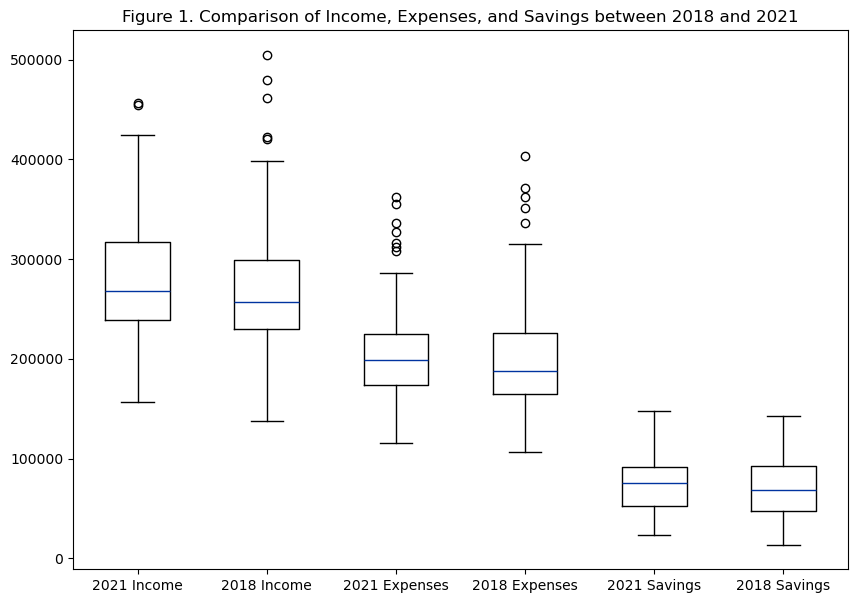

In [107]:
fig = plt.figure(figsize =(10, 7)) 
labels = ['2021 Income', '2018 Income',
          '2021 Expenses', '2018 Expenses',
          '2021 Savings', '2018 Savings']
plt.boxplot([data_2021_toinc, data_2018_toinc,
             data_2021_totex, data_2018_totex,
             data_2021_savings, data_2018_savings], labels=labels)
plt.title('Figure 1. Comparison of Income, Expenses, and Savings '
          'between 2018 and 2021')
plt.show()

<h3>Objective</h3>

This study aims to discern the economic impact of the COVID-19 pandemic on the Filipino community by analyzing changes in savings, income, and expenses between the years 2018 and 2021. This period is significant as it encompasses the pre-pandemic and pandemic phases, expected to have profound implications on financial behaviors.

<h3>Null and Alternative Hypothesis</h3>

<b>For Income:</b>
* Null Hypothesis: There is no significant difference between Filipino income in 2018 and 2021.
* Alternative Hypothesis: There is significant difference between the income  in 2018 and 2021.

<b>For Expense:</b>
* Null Hypothesis: There is no significant difference between Filipino expense in 2018 and 2021.
* Alternative Hypothesis: There is significant difference between the Filipino expense in 2018 and 2021.

<b>For Savings = Income - Expenditure</b>
* Null Hypothesis: There is no significant difference between Filipino savings in 2018 and 2021.
* Alternative Hypothesis: There is significant difference between the Filipino savings in 2018 and 2021.

<h3>Hypothesis Testing</h3>

In [15]:
def pair_t_test(data_2021, data_2018):
    t_statistic, p_value = stats.ttest_rel(data_2021, data_2018)
    print("\nPaired Samples t-Test")
    print("T-Statistic:", t_statistic)
    print("P-Value:", p_value)

    if p_value < sig:
        print("Reject the null hypothesis, the alternative must be true.") 
    else:
        print("Fail to reject the null hypothesis.")

In [16]:
sig = 0.05

A <b>paired t-test</b> was conducted per hypothesis for the income, expense and savings, with a significance of 0.05. The households were grouped on a province level. The pairs consist of the average income, expense and savings of each province between 2018 versus 2021.

<b>For Income:</b>

In [17]:
pair_t_test(data_2021_toinc, data_2018_toinc)


Paired Samples t-Test
T-Statistic: 2.1208894861849616
P-Value: 0.03681014072923067
Reject the null hypothesis, the alternative must be true.


<b>For Expense:</b>

In [18]:
pair_t_test(data_2021_totex, data_2018_totex)


Paired Samples t-Test
T-Statistic: 0.9948473108739614
P-Value: 0.32260148562071767
Fail to reject the null hypothesis.


<b>For Savings:</b>

In [19]:
pair_t_test(data_2021_savings, data_2018_savings)


Paired Samples t-Test
T-Statistic: 1.9286416933150923
P-Value: 0.05707412766103533
Fail to reject the null hypothesis.


<h3>Results</h3>

Based on the results of the hypothesis testing, we cannot firmly conclude that there is a significant difference between the expense and savings between the years 2018 to 2021.

However, we can say that <b>there is a significant difference between the income for 2018 and 2021.</b>

<h2>2. Is there a significant correlation between the income versus other features (e.g. family size, expense types, etc.) for provinces with the lowest and highest income difference between 2018 and 2021? </h2>

<h3>EDA</h3>

In [20]:
data_inc_dec = df_fies2021.copy()
data_inc_dec['INC_DEC'] = pd.qcut(data_inc_dec['TOINC'], q=10, labels=False)

To conduct the EDA, the dataset was split into 10 deciles based on total income. Afterwards, the family size was plotted per decile to identify for potential for patterns.

As shown below in <b>Figure 2. Distribution of Family Size Across Income Deciles</b>, there is a potential for a correlation between the family size and income that can be further explored via hypothesis testing.

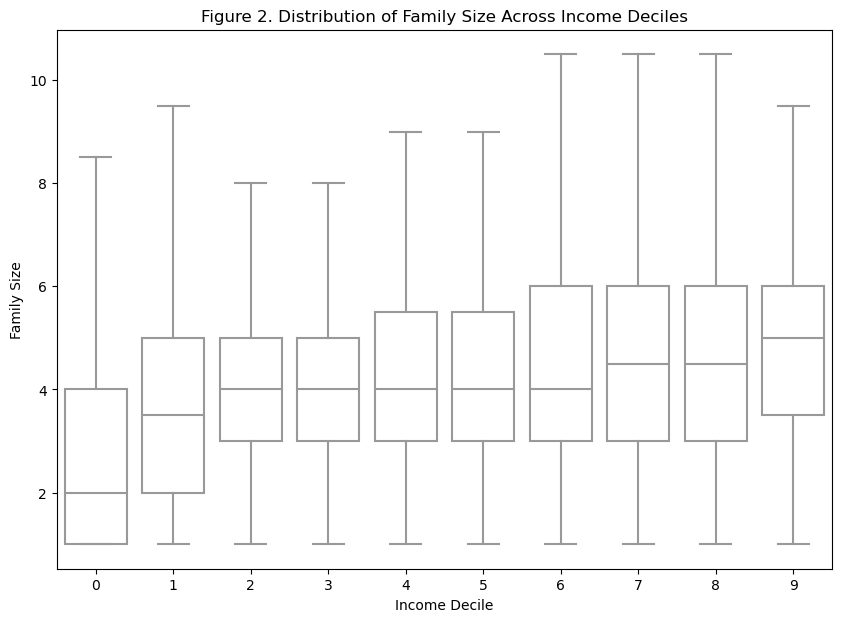

In [108]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='INC_DEC', y='FSIZE', data=data_inc_dec, color='white', sym='')
plt.xlabel('Income Decile')
plt.ylabel('Family Size')
plt.title('Figure 2. Distribution of Family Size Across Income Deciles')

plt.show()

Similarly, the total expense was plotted per decile to identify for potential for patterns.

As shown below in <b>Figure 3. Distribution of Total Expense Across Income Deciles</b>, there is a potential for a correlation between the expense and income that can be further explored via hypothesis testing.

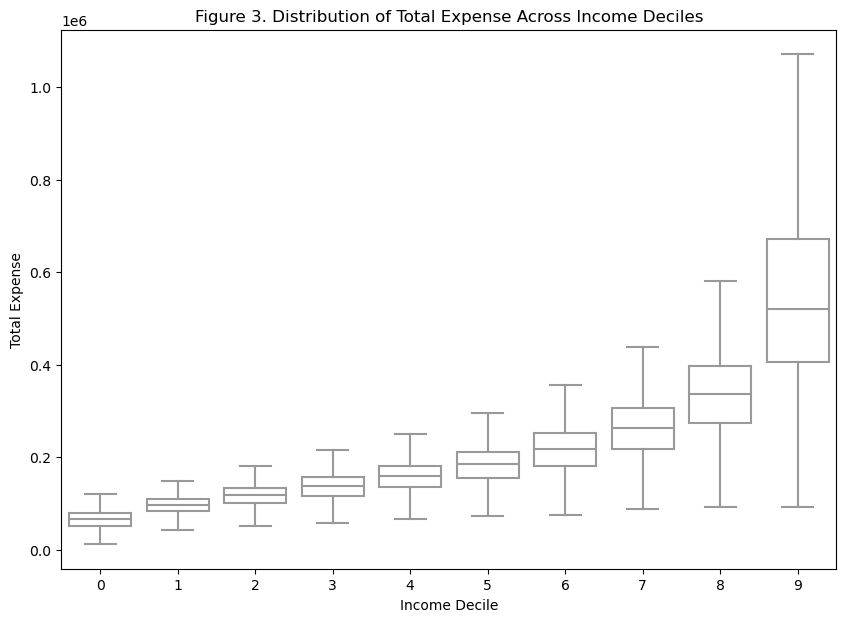

In [109]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='INC_DEC', y='TOTEX', data=data_inc_dec, color='white', sym='')
plt.xlabel('Income Decile')
plt.ylabel('Total Expense')
plt.title('Figure 3. Distribution of Total Expense Across Income Deciles')

plt.show()

In [23]:
data_difference_income = data_2021_toinc - data_2018_toinc

Lastly, the income differences between 2018 and 2021 were plotted on a province level. As expected, there was an identified variability between the provinces, as displayed in <b>Figure 4. Total Income Difference between 2018 and 2021 per Province</b>.

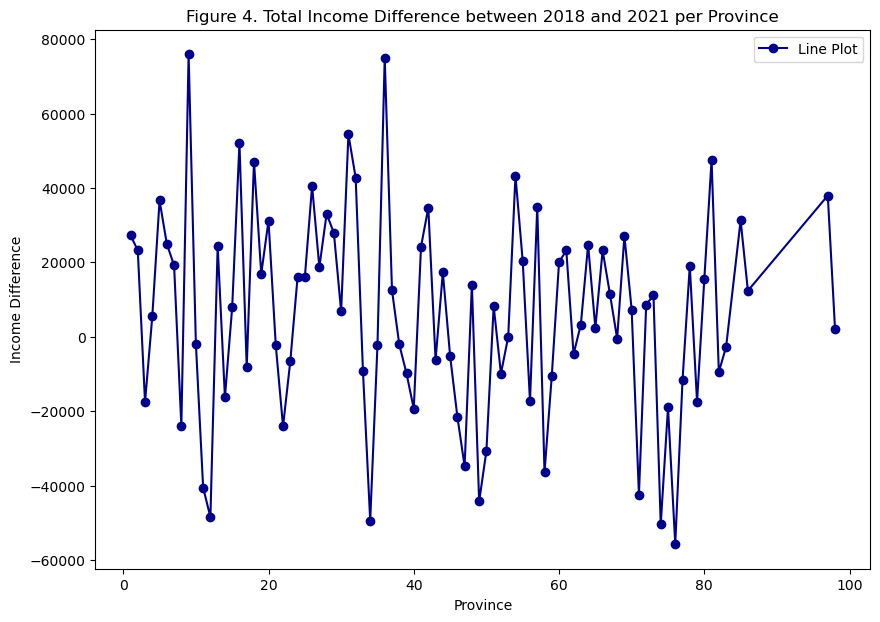

In [111]:
plt.figure(figsize=(10, 7))
plt.plot(data_difference_income.index, data_difference_income, marker='o',
         linestyle='-', label='Line Plot', color='darkblue')
plt.title('Figure 4. Total Income Difference between 2018 and 2021 '
          'per Province')
plt.xlabel('Province')
plt.ylabel('Income Difference')
plt.legend()
plt.show()

Given the observed variability, the hypothesis test would be split into two sections exploring the correlation of income versus other features (e.g. family size, expenditures) on a province level.

Specifically, the study will focus on the two provinces with the minimum and maximum income differences between 2018 and 2021, as identified below.

In [25]:
print(f'Province with the max income difference: '
      f'{data_difference_income.idxmax()}.')
print(f'Province with the min income difference: '
      f'{data_difference_income.idxmin()}.')

Province with the max income difference: 9.
Province with the min income difference: 76.


<h3>Objective</h3>

The objectives of this analysis are to understand what affects income across provinces, potentially identify provincial differences, guide policymaking, tackle income disparities, improve economic stability, ensure growth benefits all, and support sustainable development. This helps in creating effective, fair policies for diverse provincial economies.

<h3>Null and Alternative Hypothesis</h3>

<b>For Province 9:</b>
* Null Hypothesis: There is no significant correlation between the income for 2021 versus other features such as family size, expenditure types, etc, for the province with the max income difference.
* Alternative Hypothesis: There is a significant correlation between the income for 2021 versus other features such as family size, expenditure types, etc, for the province with the max income difference.

<b>For Province 76:</b>
* Null Hypothesis: There is no significant correlation between the income for 2021 versus other features such as family size, expenditure types, etc, for the province with the min income difference.
* Alternative Hypothesis: There is a significant correlation between the income for 2021 versus other features such as family size, expenditure types, etc, for the province with the min income difference.

<h3>Hypothesis Testing</h3>

<b>For Province 9:</b>

In [45]:
df_fies_2021_filtered = df_fies2021[[
    'FSIZE', 'W_PROV', 'TOINC', 'LOSSES', 'BREAD', 'MEAT', 'FISH', 'MILK',
    'OIL', 'FRUIT', 'VEG', 'SUGAR', 'FOOD_NEC', 'FRUIT_VEG', 'COFFEE', 'TEA',
    'COCOA', 'WATER', 'SOFTDRINKS', 'OTHER_NON_ALCOHOL', 'ALCOHOL',
    'TOBACCO', 'OTHER_VEG', 'SERVICES_PRIMARY_GOODS',
    'ALCOHOL_PROCDUCTION_SERVICES', 'FOOD_HOME', 'FOOD_OUTSIDE', 'FOOD',
    'CLOTH', 'FURNISHING', 'HEALTH', 'HOUSING_WATER', 'ACTRENT', 'RENTVAL',
    'TRANSPORT', 'COMMUNICATION', 'RECREATION', 'EDUCATION', 'INSURANCE',
    'MISCELLANEOUS', 'DURABLE', 'OCCASION', 'OTHER_EXPENDITURE',
    'OTHER_DISBURSEMENT', 'FOOD_ACCOM_SRVC', 'NFOOD', 'TOTDIS', 'OTHREC',
    'URB', 'RPROV', 'RPSU', 'BWEIGHT', 'RFACT_POP']]

In [46]:
def ols_result_max(df_fies_2021_filtered, data_difference_income):
    df_prov_max = df_fies_2021_filtered[df_fies_2021_filtered['W_PROV'] == data_difference_income.idxmax()]
    df_prov_max_X = df_prov_max.drop(['W_PROV', 'TOINC'], axis=1)
    df_prov_max_y = df_prov_max['TOINC']
    df_prov_max_X = sm.add_constant(df_prov_max_X)
    model = sm.OLS(df_prov_max_y, df_prov_max_X).fit()
    return model.summary()

In [47]:
def df_prov_X_y(df_fies_2021_filtered, data_difference_income, max_inc_prov):
    if max_inc_prov:
        df_prov = df_fies_2021_filtered[df_fies_2021_filtered['W_PROV'] == data_difference_income.idxmax()]
    else:
        df_prov = df_fies_2021_filtered[df_fies_2021_filtered['W_PROV'] == data_difference_income.idxmin()]
    df_prov_X = df_prov.drop(['W_PROV', 'TOINC'], axis=1)
    df_prov_y = df_prov['TOINC']
    model = sm.OLS(df_prov_y, df_prov_X).fit()
    return df_prov_X, df_prov_y, model

<b>Linear Regression</b> was conducted per hypothesis for the lowest and highest income difference provinces. The features tested for correlation against the income was the family size and all expenditure sub-types, for 2021.

The R-squared is at <b>0.798</b> which indicates how well the independent variables explain the variability of the dependent variable. Currently, the score is relatively good.

However, upon checking the p-values, multiple independent variables are greater than 0.05 which indicates they are statistically not significant predictor of 'income', and can be subject for exclusion.

Upon examining the theoretrical quantiles vs sample quantiles, the datapoints do not fit well the theoretrical distribution.

In [53]:
df_prov_max_X, df_prov_max_y, model_max = df_prov_X_y(df_fies_2021_filtered, data_difference_income, max_inc_prov=True)
df_prov_max_X = sm.add_constant(df_prov_max_X)
model_max = sm.OLS(df_prov_max_y, df_prov_max_X).fit()
model_max.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  TOINC   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     53.62
Date:                Wed, 06 Dec 2023   Prob (F-statistic):          2.45e-185
Time:                        14:42:57   Log-Likelihood:                -9051.5
No. Observations:                 670   AIC:                         1.820e+04
Df Residuals:                     623   BIC:                         1.841e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
FSIZE                         2.046e+04   5408.577      3.782      0.000    9835.226    3.11e+04
LOSSES                        9.951e-07   4.75e-07      2.094      0.037    6.18e-08    1.93e-06
BREAD                         6330.6692   1.85e+04      0.341      0.733   -3.01e+04    4.28e+04
MEAT                          6332.5107   1.85e+04      0.341      0.733   -3.01e+04    4.28e+04
FISH                          6331.4626   1.85e+04      0.341      0.733   -3.01e+04    4.28e+04
MILK                          6329.3840   1.85e+04      0.341      0.733   -3.01e+04    4.28e+04
OIL                           6331.5913   1.85e+04      0.341      0.733   -3.01e+04    4.28e+04
FRUIT                         6330.2833   1.85e+04      0.341      0.733   -3.01e+04    4.28e+04
VEG                           6330.0492   1.85e+04      0.341      0.733   -3.01e+04    4.28e+04
SUGAR                         6324.7364   1.85e+04      0.341      0.733   -3.01e+04    4.28e+04
FOOD_NEC                      6332.0134   1.85e+04      0.341      0.733   -3.01e+04    4.28e+04
FRUIT_VEG                     6318.0851   1.85e+04      0.341      0.734   -3.01e+04    4.27e+04
COFFEE                        6327.8794   1.85e+04      0.341      0.733   -3.01e+04    4.28e+04
TEA                           6322.0343   1.85e+04      0.341      0.733   -3.01e+04    4.27e+04
COCOA                         6328.3891   1.85e+04      0.341      0.733   -3.01e+04    4.28e+04
WATER                         6328.5434   1.85e+04      0.341      0.733   -3.01e+04    4.28e+04
SOFTDRINKS                    6346.3548   1.85e+04      0.342      0.732   -3.01e+04    4.28e+04
OTHER_NON_ALCOHOL              -25.9298     21.530     -1.204      0.229     -68.209      16.350
ALCOHOL                       1.323e+04   7875.509      1.680      0.094   -2237.080    2.87e+04
TOBACCO                       1.323e+04   7875.423      1.680      0.093   -2233.783    2.87e+04
OTHER_VEG                     1.323e+04   7875.818      1.680      0.093   -2232.277    2.87e+04
SERVICES_PRIMARY_GOODS        1.341e-08   1.02e-08      1.316      0.189    -6.6e-09    3.34e-08
ALCOHOL_PROCDUCTION_SERVICES  1.207e+04   8749.155      1.380      0.168   -5108.478    2.93e+04
FOOD_HOME                    -2827.2856   1.18e+04     -0.239      0.811    -2.6e+04    2.04e+04
FOOD_OUTSIDE                  3507.1645   6789.463      0.517      0.606   -9825.841    1.68e+04
FOOD                           679.8788   5245.758      0.130      0.897   -9621.630     1.1e+04
CLOTH                         1.323e+04   7875.427      1.680      0.093   -2234.183    2.87e+04
FURNISHING                    1.323e+04   7875.478      1.680      0.093   -2236.058    2.87e+04
HEALTH                        1.323e+04   7875.496      1.680      0.093   -

In [54]:
def lasso_reg(df_prov_X, df_prov_y, alpha, max_iter, to_drop):
    X_train, X_test, y_train, y_test = train_test_split(df_prov_X, df_prov_y, test_size=0.2, random_state=42)
    df_prov_X_ = df_prov_X
    lasso2 = Lasso(alpha=alpha, max_iter=max_iter).fit(X_train, y_train)
    true_indices = np.where(lasso2.coef_ != 0)[0]
    df_prov_X_ = df_prov_X_.iloc[:, true_indices]
    df_prov_X_ = df_prov_X_.drop(to_drop, axis=1)
    return df_prov_X_

In [55]:
#Tuning Lasso Regularization
df_prov_max_X, df_prov_max_y, model_max = df_prov_X_y(df_fies_2021_filtered, data_difference_income, max_inc_prov=True)
df_prov_max_X = sm.add_constant(df_prov_max_X)
alpha=1000000000
max_iter=10000000
to_drop = 'RENTVAL'
df_prov_max_X_ = lasso_reg(df_prov_max_X, df_prov_max_y, alpha, max_iter, to_drop)

training set score: 0.739351
test set score: 0.611879
number of features used: 6


In [56]:
df_prov_max_X_ = np.power(df_prov_max_X_, 1/3)
df_prov_max_y_ = np.power(df_prov_max_y, 1/3)

In [57]:
# X_train = sm.add_constant(X_train)
model_max_tf = sm.OLS(df_prov_max_y_, df_prov_max_X_).fit()
model_max_tf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  TOINC   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                          1.066e+04
Date:                Wed, 06 Dec 2023   Prob (F-statistic):                        0.00
Time:                        14:43:44   Log-Likelihood:                         -2366.4
No. Observations:                 670   AIC:                                      4743.
Df Residuals:                     665   BIC:                                      4765.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
FOOD                  0.2876      0.045      6.406      0.000       0.199       0.376
OTHER_EXPENDITURE     0.2761      0.042      6.519      0.000       0.193       0.359
NFOOD                 0.3376      0.049      6.894      0.000       0.241       0.434
TOTDIS                0.5566      0.045     12.435      0.000       0.469       0.645
OTHREC               -0.1464      0.019     -7.835      0.000      -0.183      -0.110
==============================================================================
Omnibus:                       42.869   Durbin-Watson:                   1.767
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.818
Skew:                           0.529   Prob(JB):                     1.69e-13
Kurtosis:                       3.994   Cond. No.                         20.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After excluding multicollinear independent variables via conducting lasso regressione and conducting transformation on the values, the R-squared is <b>0.972</b>, a value equal to the Adjusted R-squared, suggesting successful removal of multicollinear independent variables.

Furthermore, only <b>5 independent variables</b> can explain 97.2% of the variability in income.

The produce points aligned closely along a diagonal line, indicating that the predicted values are close to the observed values. This also indicates great performance of linear model.

In the theoretrical quantiles vs sample quantiles, the datapoints fit well with the theoretrical distribution.

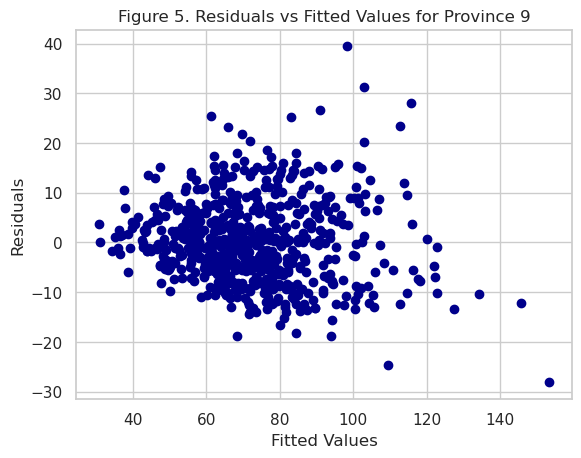

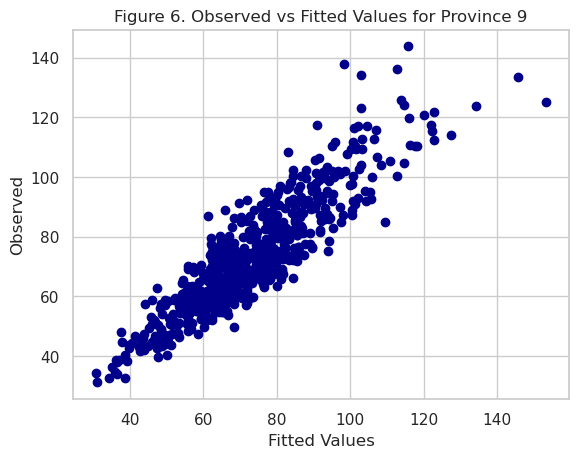

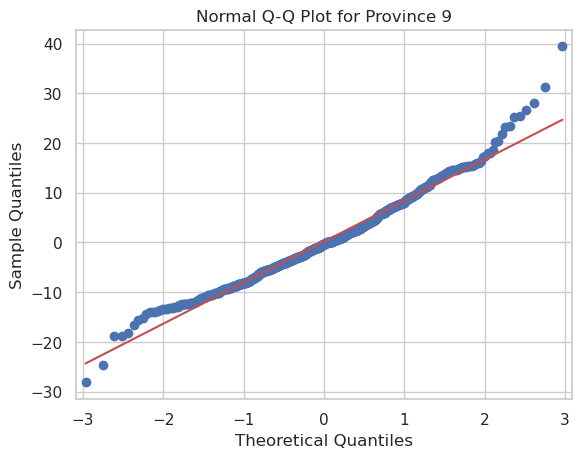

In [120]:
plt.scatter(model_max_tf.fittedvalues, model_max_tf.resid, color='darkblue')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title(f'Figure 5. Residuals vs Fitted Values for Province {data_difference_income.idxmax()}')
plt.show()

plt.scatter(model_max_tf.fittedvalues, df_prov_max_y_, color='darkblue')
plt.xlabel('Fitted Values')
plt.ylabel('Observed')
plt.title(f'Figure 6. Observed vs Fitted Values for Province {data_difference_income.idxmax()}')
plt.show()

sm.qqplot(model_max_tf.resid, line='r')
plt.title(f'Normal Q-Q Plot for Province {data_difference_income.idxmax()}')
plt.show()

<b>For Province 76:</b>

The R-squared is at <b>0.902</b> which indicates how well the independent variables explain the variability of the dependent variable. Currently, the score is very good.

However, upon checking the p-values, multiple independent variables are greater than 0.05 which indicates they are statistically not significant predictor of 'income', and can be subject for exclusion.

Upon examining the theoretrical quantiles vs sample quantiles, the datapoints do not fit well the theoretrical distribution.

In [67]:
df_prov_min_X, df_prov_min_y, model_min = df_prov_X_y(df_fies_2021_filtered, data_difference_income, max_inc_prov=False)
df_prov_min_X = sm.add_constant(df_prov_min_X)
model_min = sm.OLS(df_prov_min_y, df_prov_min_X).fit()
model_min.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  TOINC   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     1613.
Date:                Wed, 06 Dec 2023   Prob (F-statistic):               0.00
Time:                        14:47:32   Log-Likelihood:            -1.1475e+05
No. Observations:                8780   AIC:                         2.296e+05
Df Residuals:                    8729   BIC:                         2.300e+05
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
FSIZE                         2237.5293    869.463      2.573      0.010     533.176    3941.882
LOSSES                          -0.6594      0.762     -0.866      0.387      -2.153       0.834
BREAD                         6327.7318   3761.305      1.682      0.093   -1045.313    1.37e+04
MEAT                          6327.0764   3761.305      1.682      0.093   -1045.969    1.37e+04
FISH                          6327.6151   3761.308      1.682      0.093   -1045.435    1.37e+04
MILK                          6326.7783   3761.306      1.682      0.093   -1046.269    1.37e+04
OIL                           6329.2810   3761.306      1.683      0.092   -1043.767    1.37e+04
FRUIT                         6327.4067   3761.308      1.682      0.093   -1045.644    1.37e+04
VEG                           6325.9199   3761.308      1.682      0.093   -1047.130    1.37e+04
SUGAR                         6324.6456   3761.308      1.682      0.093   -1048.404    1.37e+04
FOOD_NEC                      6327.1848   3761.306      1.682      0.093   -1045.862    1.37e+04
FRUIT_VEG                     6326.1133   3761.302      1.682      0.093   -1046.925    1.37e+04
COFFEE                        6326.3582   3761.308      1.682      0.093   -1046.692    1.37e+04
TEA                           6331.3850   3761.297      1.683      0.092   -1041.644    1.37e+04
COCOA                         6323.4686   3761.303      1.681      0.093   -1049.573    1.37e+04
WATER                         6329.5739   3761.308      1.683      0.092   -1043.477    1.37e+04
SOFTDRINKS                    6324.1908   3761.290      1.681      0.093   -1048.824    1.37e+04
OTHER_NON_ALCOHOL                2.2833      3.179      0.718      0.473      -3.948       8.515
ALCOHOL                       1010.4641   2859.460      0.353      0.724   -4594.752    6615.680
TOBACCO                       1009.5474   2859.462      0.353      0.724   -4595.671    6614.766
OTHER_VEG                      981.2557   2859.617      0.343      0.731   -4624.267    6586.779
SERVICES_PRIMARY_GOODS        1013.5912   2859.466      0.354      0.723   -4591.637    6618.820
ALCOHOL_PROCDUCTION_SERVICES  1013.6146   2859.789      0.354      0.723   -4592.247    6619.476
FOOD_HOME                    -3689.6147   1.21e+04     -0.304      0.761   -2.74e+04    2.01e+04
FOOD_OUTSIDE                  2637.6392   1.15e+04      0.229      0.819   -1.99e+04    2.52e+04
FOOD                         -7656.6247   1.78e+04     -0.430      0.667   -4.26e+04    2.72e+04
CLOTH                         1010.2489   2859.463      0.353      0.724   -4594.974    6615.472
FURNISHING                    1009.8766   2859.464      0.353      0.724   -4595.347    6615.100
HEALTH                        1009.8010   2859.463      0.353      0.724   -

In [68]:
X_train, X_test, y_train, y_test = train_test_split(df_prov_min_X, df_prov_min_y, test_size=0.2, random_state=42)
lasso2 = Lasso(alpha=100000000, max_iter=10000000).fit(X_train, y_train)
true_indices = np.where(lasso2.coef_ != 0)[0]
df_prov_min_X = df_prov_min_X.iloc[:, true_indices]
# df_prov_min_X_ = df_prov_min_X_.drop('ACTRENT', axis=1)

training set score: 0.886100
test set score: 0.931945
number of features used: 8


In [69]:
df_prov_min_X_ = np.power(df_prov_min_X, 1/3)
df_prov_min_y_ = np.power(df_prov_min_y, 1/3)

In [70]:
# X_train = sm.add_constant(X_train)
model_min_tf = sm.OLS(df_prov_min_y_, df_prov_min_X_).fit()
model_min_tf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  TOINC   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          2.134e+05
Date:                Wed, 06 Dec 2023   Prob (F-statistic):                        0.00
Time:                        14:47:53   Log-Likelihood:                         -27022.
No. Observations:                8780   AIC:                                  5.406e+04
Df Residuals:                    8772   BIC:                                  5.412e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
FOOD              0.0896      0.011      8.517      0.000       0.069       0.110
HEALTH           -0.0322      0.010     -3.276      0.001      -0.052      -0.013
ACTRENT          -0.0283      0.003     -8.289      0.000      -0.035      -0.022
RENTVAL          -0.0529      0.010     -5.307      0.000      -0.072      -0.033
COMMUNICATION     0.0565      0.012      4.657      0.000       0.033       0.080
NFOOD             0.1825      0.018     10.015      0.000       0.147       0.218
TOTDIS            0.8882      0.017     52.010      0.000       0.855       0.922
OTHREC           -0.1348      0.005    -27.263      0.000      -0.145      -0.125
==============================================================================
Omnibus:                     1449.380   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3482.136
Skew:                           0.935   Prob(JB):                         0.00
Kurtosis:                       5.454   Cond. No.                         49.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After excluding multicollinear independent variables via conducting lasso regressione and conducting transformation on the values, the R-squared is <b>0.995</b>, a value equal to the Adjusted R-squared, suggesting successful removal of multicollinear independent variables.

Furthermore, only <b>8 independent variables</b> can explain 99.5% of the variability in income.

The produce points aligned closely along a diagonal line, indicating that the predicted values are close to the observed values. This also indicates great performance of linear model.

In the theoretrical quantiles vs sample quantiles, the datapoints fit well with the theoretrical distribution.

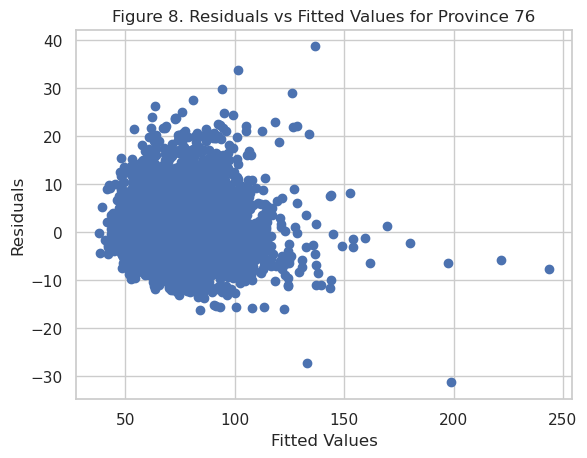

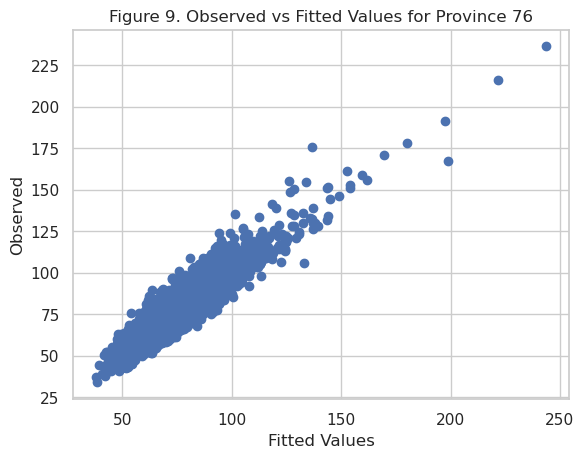

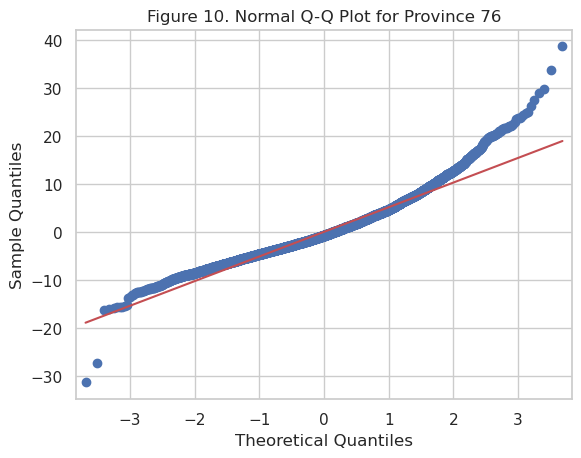

In [121]:
plt.scatter(model_min_tf.fittedvalues, model_min_tf.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title(f'Figure 8. Residuals vs Fitted Values for Province {data_difference_income.idxmin()}')
plt.show()

plt.scatter(model_min_tf.fittedvalues, df_prov_min_y_)
plt.xlabel('Fitted Values')
plt.ylabel('Observed')
plt.title(f'Figure 9. Observed vs Fitted Values for Province {data_difference_income.idxmin()}')
plt.show()

sm.qqplot(model_min_tf.resid, line='r')
plt.title(f'Figure 10. Normal Q-Q Plot for Province {data_difference_income.idxmin()}')
plt.show()

<h3>Results</h3>

<b>For Province 9:</b>

The OLS regression results indicate a very high R-squared value of 0.988, suggesting that approximately 98.8% of the variability in the dependent variable, which could be income for 2021, is explained by the independent variables included in the model. This high R-squared value often implies a strong fit of the model to the observed data.

The F-statistic is significant, with a p-value close to 0.00, indicating that we can reject the null hypothesis that all of the regression coefficients are equal to zero. This suggests that as a whole, There is a significant correlation between the income for 2021 versus independent variables such as <b>Food, Other Expenditure, Non-Food Expenditure, Total Disbursements, and Other Receipts</b> for the province with the max income difference.

Looking at the individual coefficients, all of them except have p-values less than 0.05, indicating that these variables are statistically significant at the 5% significance level. Specifically:

The variable 'FOOD' has a coefficient of 0.2876, which is significant, implying that there is a positive correlation between food expenditure and income.
'OTHER_EXPENDITURE' also has a positive and significant coefficient, indicating a positive relationship with income.
'NFOOD' has the highest coefficient among the variables at 0.5376, suggesting a strong positive relationship with income.
'TOTDIS' shows a positive correlation with income, but with a less strong coefficient than 'NFOOD'.
'OTHREC', however, has a negative coefficient and is significant, indicating an inverse relationship with income.
Given these results, we can reject the null hypothesis and accept the alternative hypothesis that there is a significant correlation between the income for 2021 and other features such as family size, expenditure types, etc., for the province with the maximum income difference.

The Durbin-Watson statistic of 1.7567 is close to 2, which suggests that there is no significant autocorrelation in the residuals. The JB test for normality indicates that the residuals are not normally distributed, given the significant p-value; this could be due to the large sample size which can often lead to rejection of normality.

Overall, the model have a strong explanatory power for the relationship between income and the selected independent variables in Province 9, but caution should be exercised due to potential issues with normality, which could affect the validity of the model's assumptions.

<b>For Province 76:</b>

Based on the second set of OLS regression results for Province 76, we can draw the following conclusions:

The adjusted R-squared value is 0.0995, which means that approximately 9.95% of the variance in the dependent variable is explained by the model. This is a much lower explanatory power compared to the previous model for Province 9.

The F-statistic is significant (p < 0.05), indicating that the model is statistically significant and that we can reject the null hypothesis that all of the coefficients are zero at the population level. This suggests that there is at least some correlation between the income for 2021 and the included explanatory variables.

Looking at the individual predictors:

"FOOD" has a positive coefficient and is statistically significant, indicating that there is a positive relationship between food expenditure and the dependent variable.
"HEALTH" and "ACTRENT" (possibly active rent or actual rent) have negative coefficients and are statistically significant, suggesting a negative relationship with the dependent variable.
"RENTVAL" also has a negative and significant coefficient, further indicating a negative relationship with the dependent variable.
"COMMUNICATION" has a positive and significant coefficient, implying a positive relationship.
"NFOOD" is not significant, indicating no clear relationship with the dependent variable at the 5% significance level.
"TOTDIS" has the highest positive coefficient and is significant, indicating a strong positive relationship with the dependent variable, just like in the previous model.
"OTHREC" has a negative and significant coefficient, suggesting an inverse relationship with the dependent variable.
The Durbin-Watson statistic of 1.618 is close to 2, which indicates that there is no serious autocorrelation issue in the residuals.

The Jarque-Bera test has a significant p-value, which indicates that the residuals do not follow a normal distribution. This, combined with the high kurtosis value, suggests that there may be outliers or other anomalies in the data that could be influencing the results.

Given these results, the alternative hypothesis that there is a significant correlation between the income for 2021 and other features such as family size, expenditure types, etc., for the province with the minimum income difference, is supported, although the effect sizes are relatively small compared to those in Province 9. The results should be interpreted with caution due to the potential issues with the distribution of residuals, which could affect the robustness of the regression coefficients.

<h2>3. Is the income of province with the highest income difference between 2018 and 2021 similar with other provinces belonging to the same region?</h2>

<h3>EDA</h3>

In [123]:
unique_rows = df_fies2021[['W_REGN', 'W_PROV']].drop_duplicates()
h3_df = data_difference_income.reset_index().merge(unique_rows, left_on='W_PROV', right_on='W_PROV')
h3_inc_df = data_2021_toinc.reset_index().reset_index().merge(h3_df, left_on='W_PROV', right_on='W_PROV')
h3_inc_df.columns = ['index', 'W_PROV', 'mean_inc', 'mean_inc_diff', 'W_REGN']

min_reg = h3_inc_df[h3_inc_df['W_REGN'] == h3_inc_df.loc[h3_inc_df['mean_inc_diff'].idxmin()]['W_REGN']][['W_PROV','mean_inc']]

To conduct the EDA, the incomes of the other provinces belonging to the same region as province 76 was identified and plotted alongside each other to identify for potential for patterns.

As shown below in <b>Figure 11. Mean Income 2021 for Region with Province 76</b>, there is a potential for the provinces within the same region to be similar with each other in terms of income.

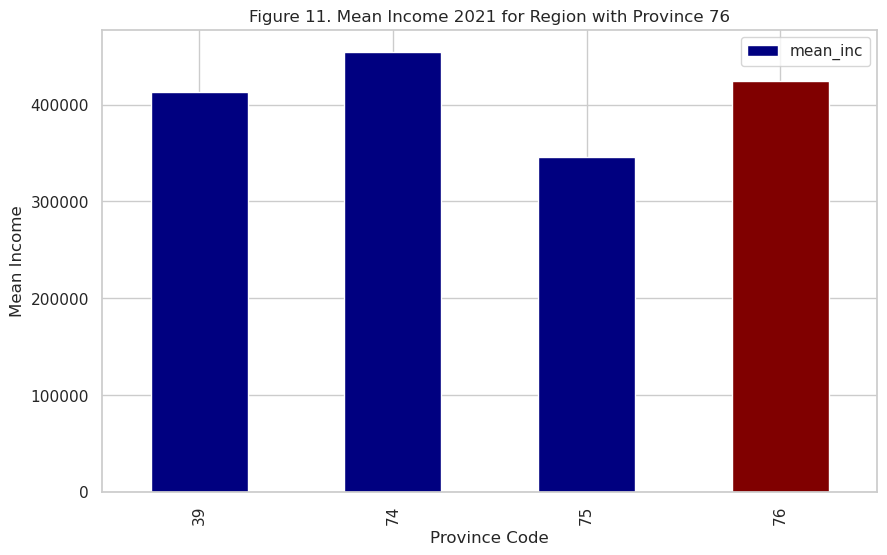

In [124]:
colors = ['maroon' if x == 76 else 'navy' for x in min_reg['W_PROV']]
ax = min_reg.plot(x='W_PROV', y='mean_inc', kind='bar', figsize=(10, 6), color=colors)
plt.title(f'Figure 11. Mean Income 2021 for Region with Province {data_difference_income.idxmin()}')
plt.xlabel('Province Code')
plt.ylabel('Mean Income')

plt.show()

<h3>Objective</h3>

The aim is to compare 2021 income levels between provinces with the lowest income changes since 2018 versus their regional counterparts, to identify economic similarities or disparities within the region. This analysis will help to potentially apply policies not only for the province, but across other provinces sharing the same region.

<h3>Null and Alternative Hypothesis</h3>

<b>For Province 76:</b>
* Null Hypothesis: The 2021 income of the province with the min income difference is the same as the other provinces within the same region.
* Alterrnative Hypothesis: The 2021 income of the province with the min income difference is not the same as the other provinces within the same region.

<h3>Hypothesis Testing</h3>

In [32]:
def conduct_anova(df, province_lowest, alpha=0.05):
    region_lowest = int(df[df['W_PROV'] == province_lowest]['W_REGN'].unique())
    lowest_income_region_data = df[df['W_REGN'] == region_lowest]
    grouped_data = lowest_income_region_data.groupby('W_PROV')['TOINC'].apply(list)

    f_statistic, p_value = f_oneway(*grouped_data)
    
    print('ANOVA')
    print(f"F-statistic: {f_statistic}")
    print(f"P-value: {p_value}")

    if p_value < alpha:
        print("Reject the null hypothesis, the alternative must be true.") 
    else:
        print("Fail to reject the null hypothesis.")

An <b>ANOVA test</b> was conducted for hypothesis testing, with a significance of 0.05, focusing on the province with minimum income difference. The variances of the income means between other provinces belonging to the same region as the specified province were tested for their similarity with one another.

In [33]:
province_lowest = data_difference_income.idxmin()
conduct_anova(df_fies2021, province_lowest)

ANOVA
F-statistic: 124.11280862729926
P-value: 1.0445083281219861e-79
Reject the null hypothesis, the alternative must be true.


<h3>Results</h3>

Based on the results of the hypothesis testing, we can say that <b>there is a significant difference between the income of the provinces belonging to the same region as that of Province 76.</b>

<div style='display: flex; justify-content: space-between; align-items: center; padding: 10px; width: 100%; background-color: #F5F5DC'>
    <h1>CONCLUSION AND RECOMMENDATIONS</h1>
    <img src='png.png' style='height: 50px; width: auto; margin-left: auto; padding: 10px'>
</div>

Given the stronger explanatory power of the model for Province 9, a potential recommendation to help Province 76 could involve focusing on the variables that were significant and had a positive correlation with income in Province 9. If these factors are actionable and can be influenced by policy or other interventions, they could be areas to target for improvement in Province 76.

<b>Food Expenditure:</b> Since food expenditure is positively correlated with income in both provinces, efforts to increase food-related economic activity, such as agricultural productivity or food markets, might have a beneficial effect on incomes.

<b>Communication Expenditure:</b> With a positive correlation in Province 76, investing in communication infrastructure could improve economic outcomes, as seen in Province 9.

<b>Total Discounts (TOTDIS):</b> This refers to some form of economic incentive or discount, Province 76 could analyze the specific policies in Province 9 that lead to such incentives and their relation to higher incomes.

A thorough analysis should be conducted to understand the context and causality behind these correlations, as direct benchmarking between provinces requires careful consideration of their unique economic, cultural, and social environments. The goal would be to adapt successful strategies from Province 9 to the specific context of Province 76, rather than applying them wholesale, to ensure they are effective and sustainable.

<div style='display: flex; justify-content: space-between; align-items: center; padding: 10px; width: 100%; background-color: #F5F5DC'>
    <h1>REFERENCES</h1>
    <img src='png.png' style='height: 50px; width: auto; margin-left: auto; padding: 10px'>
</div>

Family Income and Expenditure Survey | Philippine Statistics Authority | Republic of the Philippines. (2023, July 10). https://psa.gov.ph/statistics/income-expenditure/fies